# The steps of machine learning

### Introduction

In the last lesson we built a linear regression model in just a few lines of code.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
outcomes = [330, 780, 1130, 1310, 1780]
sklearn_inputs = [
    [800], 
    [1500],
    [2000],
    [3500],
    [4000]
]

model.fit(sklearn_inputs, outcomes)

model.predict(sklearn_inputs)

In this lesson, we'll unpack the steps that occur in the code above.  And the steps that we see in linear regression, are the same steps we'll see in any machine learning algorithm:

A machine learning algorithm:

* uses **data** 
* to find the parameters of a **hypothesis function**
* that minimize the output of our **loss function**
* by using an **optimization procedure**

Let's review each of these components in turn, starting with the data.

### 1. Gather the data


Whenever we are faced with a machine learning algorithm, our first step is to gather data related to the outcome we are trying to predict.  In our previous example, that outcome was the T-shirt sales.  How many T-shirt sales would be sold in the next month.  For the purpose of keeping our model simple, we only considered as an input the amount spent on advertising to predict T-shirt sales.  The other component that we looked at were the *answers* - that is we looked at the related monthly sales for each of the campaigns.

> Caveat: We only look at the answers in a *supervised* learning problems (whereas in unsupervised we do not).  But it's ok to ignore that distinction for now, supervised learning is the main type of machine learning we will explore in this course, and we'll explain the distinction further down the line.

This is inputs and the related outputs of our observed data.

| spending        | t-shirts           
| ------------- |:-------------:| 
|    2000        |380  | 
|    3500        |445 | 
|    4000      | 490 | 

We'll call this data our **training data**.

The first step of in machine learning is to gather our training data.  

> Our **training data** is a set of previous examples or observations, almost like a series of experiments.  

Our training data includes: 

1. Potential inputs to what we are trying to predict, and 
2. The past outcomes associated with these different inputs

| input        | output           
| ------------- |:-------------:| 
|    past input 1        | past outcome 1 | 
|    past input 2        | past outcome 2 | 

Another word we'll use for training data is **observations**.  So the first row of our `spending` `t-shirts` chart contains our first *observation*, where we observed spending of 2000 and sales of 380.

### 2. Find a hypothesis function

#### A. Start with an initial hypothesis

Now that we have our training data, which contains our inputs and outputs, we look to see if there is some association between these inputs and these outputs.  Let's plot our data to help us out.  We'll place ad spending on the x-axis and sales on the y-axis.

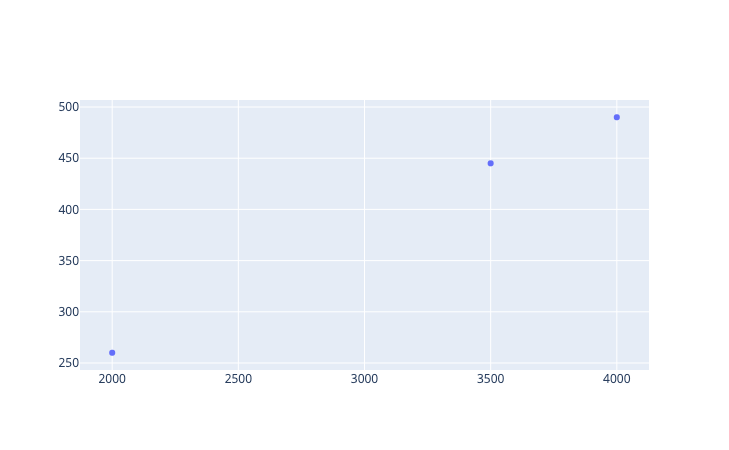

In [33]:
import plotly.graph_objects as go
observed_x_vals = [2000, 3500, 4000]
observed_y_vals = [260, 445, 490]
scatter_observed_sales = go.Scatter(x=observed_x_vals, y=observed_y_vals, name = 'actual sales', mode='markers')
go.Figure(scatter_observed_sales)

So looking at the input data of ad spending and the outputs of the sales, there does appear to be an association between the two.  Let's come up with a hypothesis function.  

> Our **hypothesis function** takes in inputs of our training data, and *comes close* to returning the observed outputs. 

Now normally we'll use a computer program to create a hypothesis function.  But, for now, let's just guess the relationship and write it down.  Here's our guess:

$$ tshirts\_sold =.15∗ad\_spend $$

#### B. Evaluate that hypothesis function

To tell whether this hypothesis function is any good, we take a look at how it would perform against our training data from our table.

We do this by comparing the predictions to what we actually observed.  We get the predictions by inputting our past `ad_spend` amounts into our hypothesis function.  We'll add this to a column next to the actual sales results.

| spending        | actual t-shirt sales | expected t-shirt sales           
| ------------- |:-------------:| :-------------:| 
|    2000        |260  | 300  | 
|    3500        |445 | 525 | 
|    4000      | 490 | 600 | 

And we can plot the predictions of our hypothesis function alongside our actual data.

In [39]:
import numpy as np
prediction_vals = list(map(lambda x_val: .15*x_val,observed_x_vals))
diffs =  np.array(observed_y_vals) - np.array(prediction_vals)
errors = dict(type='data', symmetric=False, array=diffs)
prediction_trace = go.Scatter(x = observed_x_vals, 
                              y = prediction_vals, 
                              mode = 'lines',
                              error_y = errors, name = 'predictions')

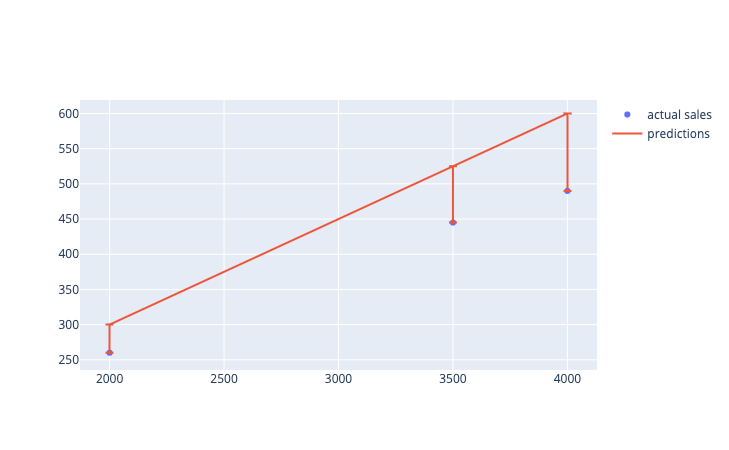

In [41]:
go.Figure(data = [scatter_observed_sales, prediction_trace])

Let's break down the plot above.  

> The orange line represents the predictions of our hypothesis function.  So for example, with a spend of 2000, it predicts 300 sales.

> The blue dots represent the actual observed sales for each of our previous amounts of ad spending.  And the red lines represent the difference between what we predicted and our observed sales.

Now remember: the goal in machine learning is to find a hypothesis function such that the outputs from our hypothesis function come *close* to our actual outputs.  

Each red line represents how far away we were.  We can get our hypothesis funtion closer to the observed outputs.  Here's how.

### 3. Use a cost function

#### Introducing the cost function

Before getting our hypothesis function closer to our observations, we first quantify just how far away our hypothesis function is from these observations.  This way we can at least get a sense of how good or bad we are performing.

We quantify how good or bad we are doing simply by using an error metric, and then summing together the error at each observed result.  This sum is called our **cost function**.

| spending        | actual sales | expected sales |(actual - expected)^2|
| ------------- |:-------------:| :-------------:| :-------------:| 
|    2000        |380           | 300                               | 6400 |
|    3500        |445           | 525                               | 6400 | 
|    4000      | 490            | 600                              |  12100 |

In [48]:
cost = (380 - 300)**2 + (445 - 525)**2  + (490 - 600)**2
cost

24900

Remember that this cost is associated with the hypothesis function $ sales =.15∗ad\_spend $ that we used for each of our predictions.

#### Use an optimization procedure to minimize the loss functoin

Now the output of our loss function only applies to a specific hypothesis function.  We want to make the result of our loss function as close to zero as possible, so we need a way to minimize our loss function.  

The way that we can do that is by finding the parameter -- above .15 is our parameter -- that minimizes our loss function.  Now our **optimization procedure** is how we find parameters that minimize our loss function.  There are different optimization procedures depending on the specific machine learning tool that we use - but here we can just do trial and error.

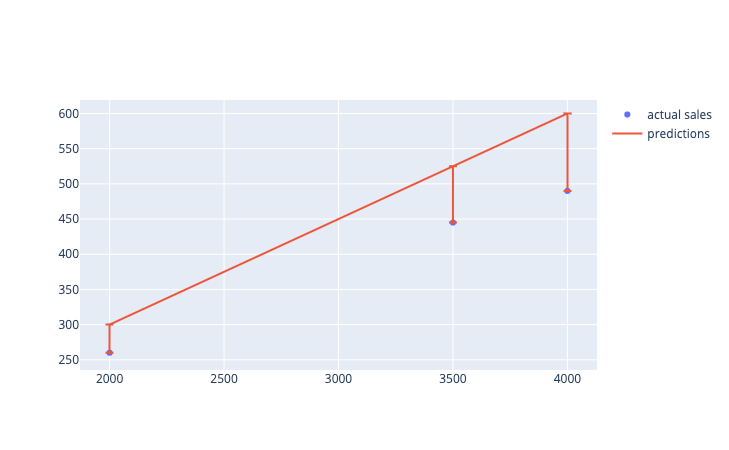

In [54]:
import numpy as np

# try changing this from .15 to .12
parameter = .15


prediction_vals = list(map(lambda x_val: parameter*x_val,observed_x_vals))
diffs =  np.array(observed_y_vals) - np.array(prediction_vals)
errors = dict(type='data', symmetric=False, array=diffs)
prediction_trace = go.Scatter(x = observed_x_vals, 
                              y = prediction_vals, 
                              mode = 'lines',
                              error_y = errors, name = 'predictions')

go.Figure(data = [scatter_observed_sales, prediction_trace])

### That's it

The canonical machine learning optimization problem is to: 
> use data to find the parameters of a hypothesis function such that we minimize the output of our loss function.  

Or to put it in terms of our graph above and formula $sales=.15∗ad_spending $, we want to change the our line such that it predicts outcomes that as close as possible to the actual observed sales.  Now in this lesson, we were introduced to **training data** a **hypothesis function** and a **loss function**.  In later lessons, we'll go through each of these steps in turn to better understand how machine learning algorithms work.